In [1]:
import numpy as np
import matplotlib.pyplot as plt
import visualization
import os
from gta_math import points_to_homo, ndc_to_view, construct_proj_matrix, view_to_world, construct_view_matrix, is_entity_in_image
from visualization import load_depth, load_stencil, save_pointcloud_csv, bbox_from_string, draw3dbboxes, draw_one_entity_3dbbox
import progressbar
from joblib import Parallel, delayed
from configparser import ConfigParser
from PIL import Image
import pickle
import json
from datetime import timedelta, datetime, date
from matplotlib.dates import DateFormatter, DateFormatter, HourLocator
import glob

In [7]:
ini_file = "gta-postprocessing.ini"
visualization.multi_page = False
visualization.ini_file = ini_file

conn = visualization.get_connection()
cur = conn.cursor()

CONFIG = ConfigParser()
CONFIG.read(ini_file)
directory = r'D:\generic-dataset'

In [28]:
def get_base_name(name):
    return os.path.basename(os.path.splitext(name)[0])

pattern = '[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9][0-9].jpg'
files = glob.glob(os.path.join(directory, pattern))
np.random.shuffle(files)

D:\generic-dataset\2018-03-30--03-04-21--157.jpg 2018-03-30--03-04-21--157
camera pos:  [1800.15466308594, -848.131896972656, 74.4434661865234]


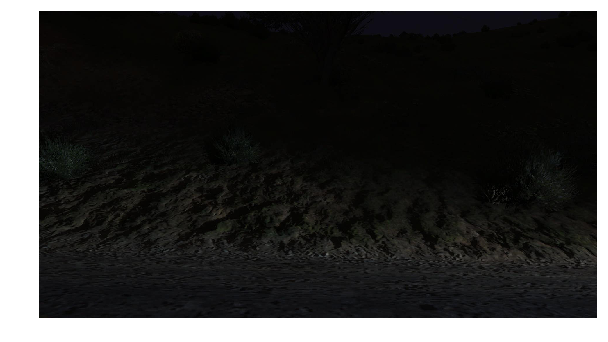

D:\generic-dataset\2018-03-30--01-17-10--199.jpg 2018-03-30--01-17-10--199
camera pos:  [503.243499755859, -1148.59057617188, 29.4699573516846]
2D bbox: [[ 1200.84444146  1053.00095147]
 [  214.21944534   314.1291167 ]]
2D bbox: [[ 1915.00052274   508.35319007]
 [ 1905.62683427   499.86323771]]
2D bbox: [[ 1108.45507903   556.41576687]
 [ 1081.75005389   544.51159398]]
2D bbox: [[ 1915.00052274    83.78779459]
 [ 1764.43568495     0.        ]]
2D bbox: [[ 1072.48526363   572.35014533]
 [ 1032.0437654    539.15268299]]


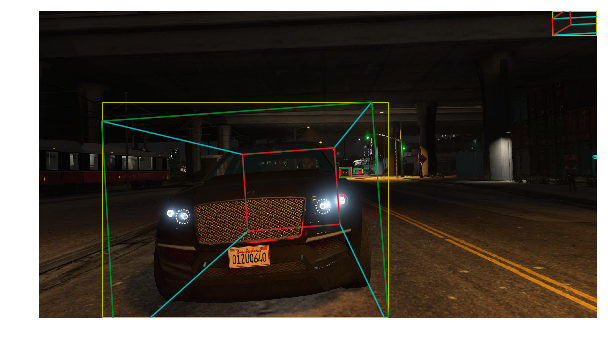

D:\generic-dataset\2018-03-30--03-51-22--371.jpg 2018-03-30--03-51-22--371
camera pos:  [2533.57666015625, 2978.673828125, 42.3260955810547]
2D bbox: [[  13.26832112  484.41081445]
 [   0.          439.46676435]]
2D bbox: [[ 1915.00052274   549.60404131]
 [ 1846.41234558   505.21426793]]


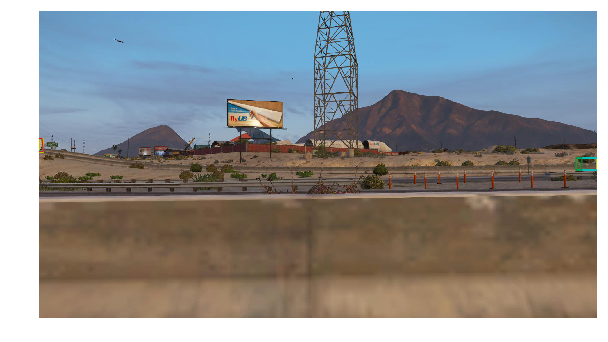

D:\generic-dataset\2018-03-30--08-54-17--587.jpg 2018-03-30--08-54-17--587
camera pos:  [1565.99609375, 3483.078125, 36.933219909668]


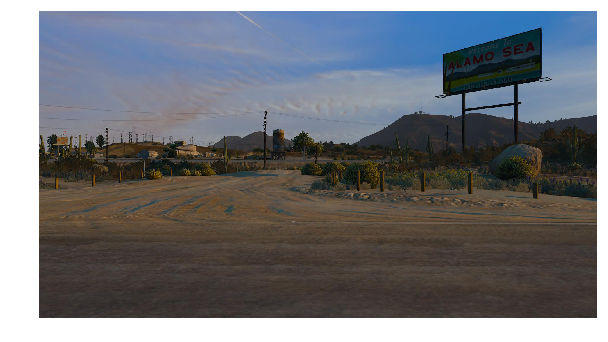

D:\generic-dataset\2018-03-07--15-59-54--680.jpg 2018-03-07--15-59-54--680
camera pos:  [805.774536132812, -1152.99487304688, 28.9307384490967]


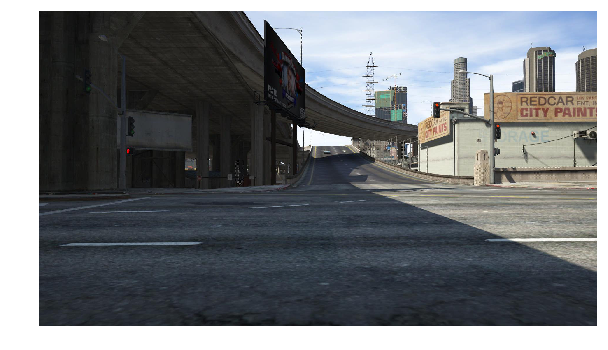

D:\generic-dataset\2018-03-30--06-03-28--294.jpg 2018-03-30--06-03-28--294
camera pos:  [2490.31005859375, 4140.3916015625, 38.0122871398926]
2D bbox: [[ 1378.21636856   571.96400157]
 [ 1142.65204824   474.65993013]]


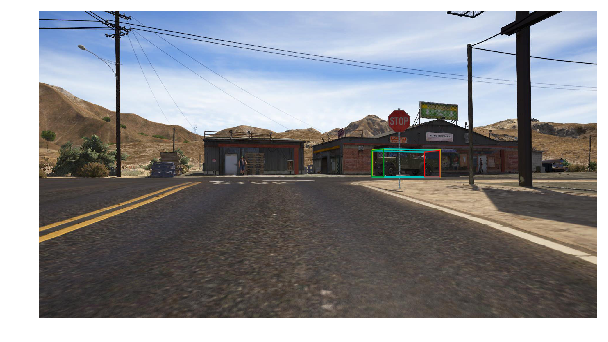

D:\generic-dataset\2018-03-30--04-52-01--641.jpg 2018-03-30--04-52-01--641
camera pos:  [1985.56140136719, 5112.33154296875, 42.938175201416]
2D bbox: [[ 1653.26508363   455.12777241]
 [ 1506.96749415   371.99357392]]


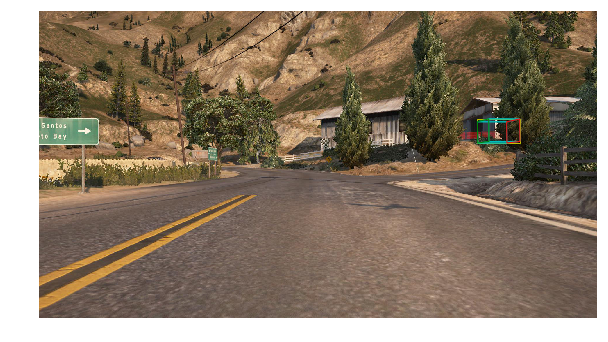

D:\generic-dataset\2018-03-07--17-48-23--412.jpg 2018-03-07--17-48-23--412
camera pos:  [1646.50866699219, -2384.37719726562, 95.0697937011719]


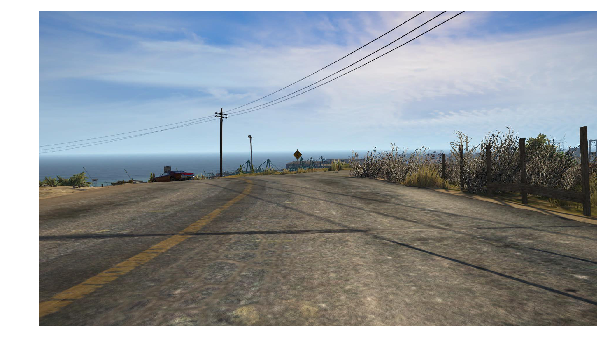

D:\generic-dataset\2018-03-30--07-53-59--766.jpg 2018-03-30--07-53-59--766
camera pos:  [1667.52648925781, 3568.1015625, 35.6897621154785]
2D bbox: [[ 1270.8393384    560.94502149]
 [ 1177.70739679   477.51915705]]
2D bbox: [[ 1265.74529911   585.41470926]
 [ 1212.24125238   500.45760478]]
2D bbox: [[ 1202.13430162   502.4057055 ]
 [ 1190.29887399   492.34097939]]


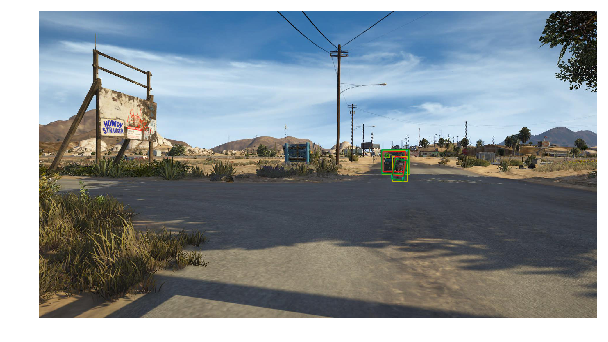

D:\generic-dataset\2018-03-07--17-14-02--363.jpg 2018-03-07--17-14-02--363
camera pos:  [2511.91088867188, -662.25244140625, 61.5116424560547]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


D:\generic-dataset\2018-03-07--17-44-32--716.jpg 2018-03-07--17-44-32--716
camera pos:  [1667.78466796875, -2122.06665039062, 107.377365112305]


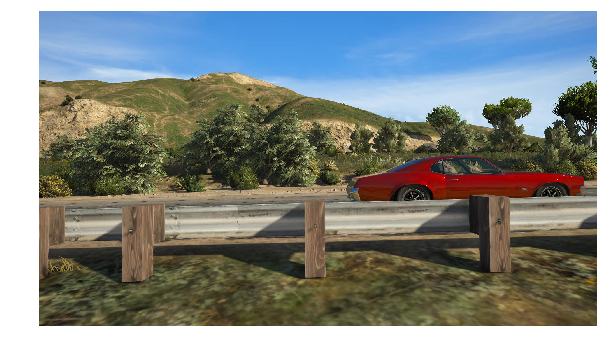

D:\generic-dataset\2018-03-30--09-22-44--768.jpg 2018-03-30--09-22-44--768
camera pos:  [797.213928222656, 3621.275390625, 33.0713424682617]
2D bbox: [[ 1082.99727941   569.90168295]
 [ 1047.88772098   547.40830517]]
2D bbox: [[ 1315.32006403   559.10752731]
 [ 1302.3764422    549.29396985]]
2D bbox: [[ 1192.02225372   575.52911167]
 [ 1137.36000885   535.80326477]]
2D bbox: [[ 1204.86727522   576.43025712]
 [ 1144.20353087   532.49592862]]
2D bbox: [[ 1224.80902588   567.03349188]
 [ 1200.63293527   554.45173457]]
2D bbox: [[ 334.91751341  595.53824364]
 [ 232.60501852  557.64066278]]


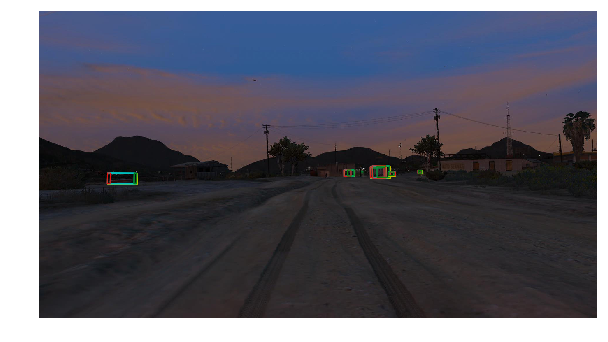

D:\generic-dataset\2018-03-30--08-56-47--740.jpg 2018-03-30--08-56-47--740
camera pos:  [1347.03735351562, 3525.46850585938, 35.669075012207]


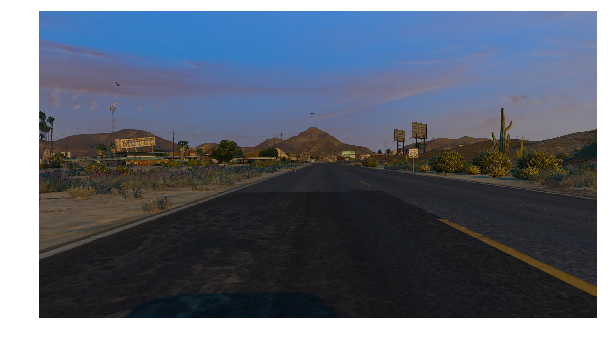

D:\generic-dataset\2018-03-30--05-59-09--293.jpg 2018-03-30--05-59-09--293
camera pos:  [2470.55444335938, 4383.5859375, 36.547924041748]
2D bbox: [[ 1570.33768511   579.97402167]
 [ 1517.63872001   563.92056094]]


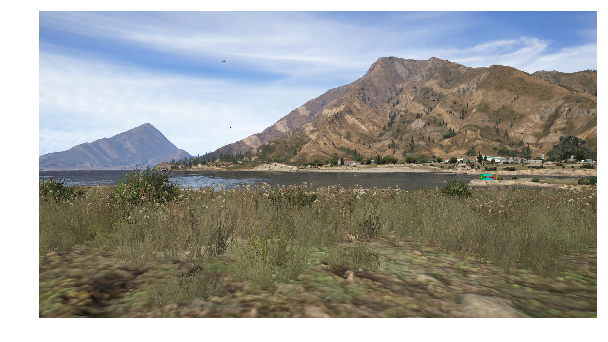

D:\generic-dataset\2018-03-30--01-55-24--951.jpg 2018-03-30--01-55-24--951
camera pos:  [787.987060546875, -843.07568359375, 43.2046318054199]
2D bbox: [[ 963.12305789  547.86824013]
 [ 950.5101292   536.9104014 ]]
2D bbox: [[ 884.28365688  549.18959941]
 [ 866.74050883  535.45224088]]
2D bbox: [[ 916.13541815  551.46651293]
 [ 899.07563224  531.30924335]]
2D bbox: [[ 779.29140663  557.10651731]
 [ 722.91087041  530.30023226]]


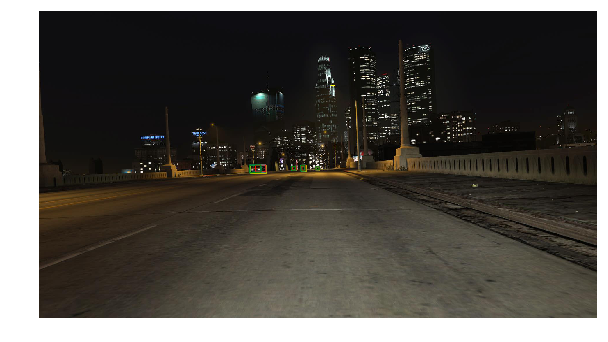

D:\generic-dataset\2018-03-07--16-40-16--403.jpg 2018-03-07--16-40-16--403
camera pos:  [154.685546875, -1376.123046875, 29.2291221618652]
2D bbox: [[ 1915.00052274   471.26572024]
 [ 1911.92438714   462.33691697]]
2D bbox: [[ 1915.00052274   417.15550782]
 [ 1906.82888497   407.01452044]]


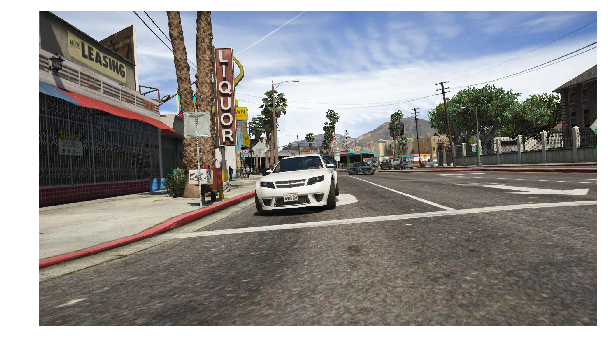

D:\generic-dataset\2018-03-30--01-31-50--392.jpg 2018-03-30--01-31-50--392
camera pos:  [475.016143798828, -1044.66662597656, 34.5416946411133]


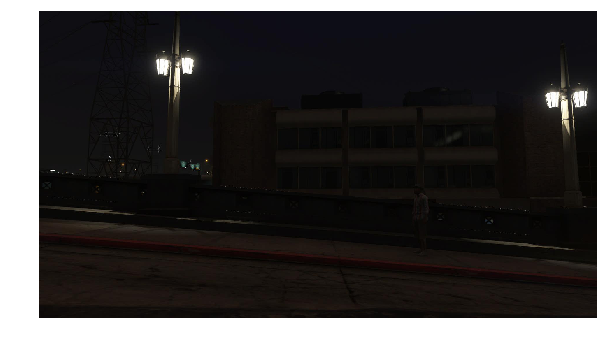

D:\generic-dataset\2018-03-07--17-04-49--222.jpg 2018-03-07--17-04-49--222
camera pos:  [1926.5390625, -762.479553222656, 85.0509033203125]
2D bbox: [[  32.24846466  788.33096804]
 [   0.          672.04282327]]


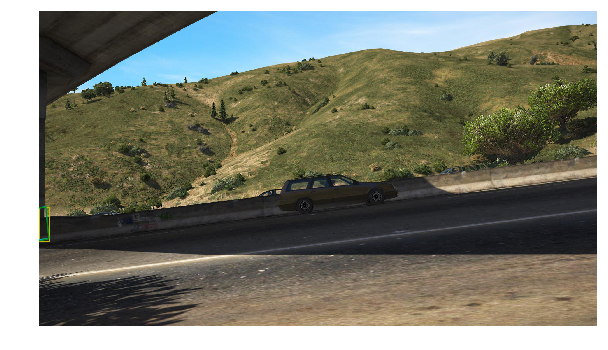

D:\generic-dataset\2018-03-07--16-18-02--972.jpg 2018-03-07--16-18-02--972
camera pos:  [393.732177734375, -1109.92114257812, 29.2510852813721]
2D bbox: [[  61.9062932   584.67913069]
 [   0.          547.43046309]]
2D bbox: [[ 1915.00052274   858.44243481]
 [  169.67824665   215.822165  ]]
2D bbox: [[   7.23038053  576.63761215]
 [   0.          565.88339776]]


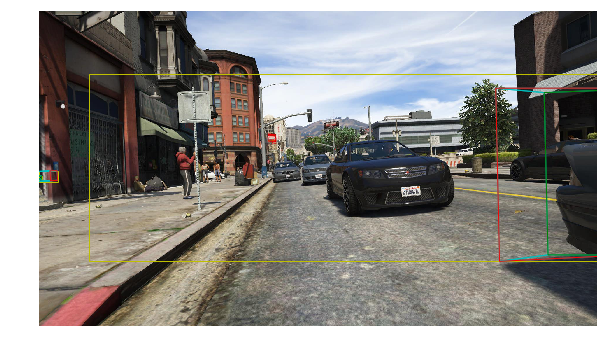

In [44]:
for file in files[260:280]:
    print(file, get_base_name(file))
    rgb_file = os.path.join(directory, '{}.jpg'.format(get_base_name(file)))
    depth_file = os.path.join(directory, '{}.png'.format(get_base_name(file)))
    if not os.path.exists(depth_file):
        depth_file = os.path.join(directory, '{}-depth.png'.format(get_base_name(file)))        
    json_file = os.path.join(directory, '{}.json'.format(get_base_name(file)))
    rgb = np.array(Image.open(rgb_file))
    depth = np.array(Image.open(depth_file))
    depth = depth / np.iinfo(np.uint16).max  # normalizing into NDC
    with open(json_file, mode='r') as f:
        data = json.load(f)
    #print(data)
    data['width'] = 1914  # not in jsons, but it is constant
    data['height'] = 1052  # not in jsons, but it is constant
    fig = plt.figure(figsize=(10, 7))
    draw3dbboxes(rgb, depth, data, fig)
    plt.show()